## Imports

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with MPRester("GfTnOwQgZddh8BopXvNa") as m:
    bandstruct = m.get_bandstructure_by_material_id("mp-990448")

This database version has changed from the database last accessed (2021_02_08).
Please see release notes on materialsproject.org for information about what has changed.


## Graphe de la structure électronique des bandes

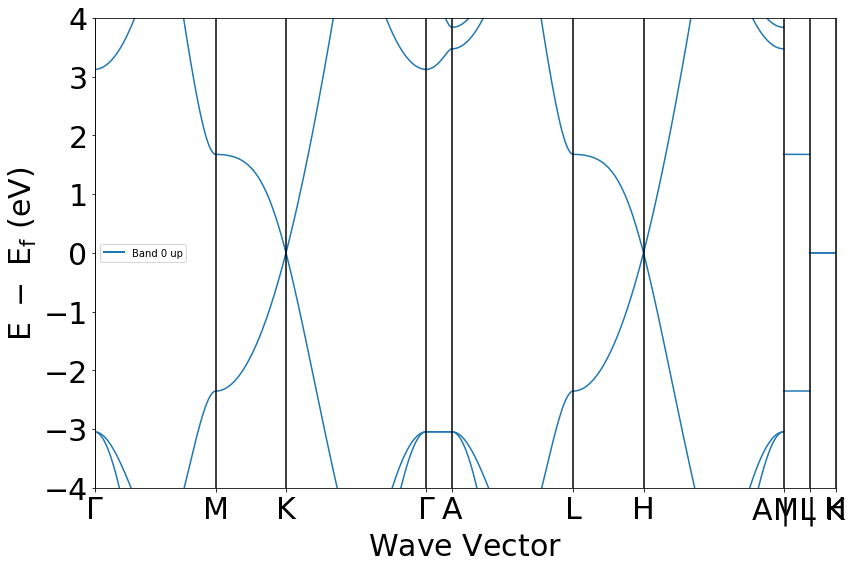

In [3]:
bsplotter = BSPlotter(bandstruct)
bsplotter.show()
#print(bandstruct.get_band_gap())

In [4]:
bandgap = bandstruct.get_band_gap()
print("la bande interdite est directe :",bandgap['direct'])
print("la largeur du gap est de :",bandgap['energy'],"eV")
print("le vecteur d'onde se déplace alors dans la direction :",bandgap['transition'])


la bande interdite est directe : True
la largeur du gap est de : 9.999999999998899e-05 eV
le vecteur d'onde se déplace alors dans la direction : K-K


## Calcul des directions de dispersion (maximale et minimale)

Afin de calculer les directions de dispersion maximale et minimale pour la bande de conduction et la bande de valence, il faut d'abord obtenir la distance de chaque intervalle. Dans mon cas il y a 7 intervalles (axe x). Le code suivant affiche d'abord une liste de la distance de chaque intervalle, la distance totale (somme de tout les intervalles) et finalement une liste de l'évolution de la distance au fur et à mesure (ex : l'élément 3 = dist1 + dist2 + dist3). Cette dernière liste sera utile plus tard.

In [5]:
bsplotter = BSPlotter(bandstruct)
data = bsplotter.bs_plot_data()
ticks = data.get('ticks')
distance = ticks.get('distance')
dist_for_m = data.get('distances')

my_distance = []
for i in range(15):
    dist = distance[i+1]-distance[i]
    if dist not in my_distance :
        if dist != 0:
            my_distance.append(dist)

# Les distances sur le graphe ci-dessus selon l'axe x.
print("Liste des intervalles :",my_distance)
print(" ")
dist_tot = 0
count = 0
array_evol_dist = [0]
for elem in my_distance:
    dist_tot += elem
    array_evol_dist.append(array_evol_dist[count]+elem)
    count += 1
print("Distance totale :",dist_tot)
print(" ")
array_evol_dist = array_evol_dist[1:]
print("Evolution de la distance :",array_evol_dist)


Liste des intervalles : [1.4696058982024944, 0.8484773451247547, 1.696954712211602, 0.3141888619497877, 1.4696058982025004, 0.8484773451247509, 1.6969547122115838]
 
Distance totale : 8.344264773027474
 
Evolution de la distance : [1.4696058982024944, 2.318083243327249, 4.015037955538851, 4.329226817488639, 5.798832715691139, 6.64731006081589, 8.344264773027474]


Dans la section suivante, je calcule les différences d'énergies pour chaque intervalle et ensuite les pentes (en valeur absolue). Le calcul de la pente est $\frac{\Delta y}{\Delta x}$ où $\Delta y$ est la différence d'énergie venant d'être calculée et $\Delta x$ est la distance de l'intervalle également calculé précédemment. Les résultats affichés sont les différences d'énergie à chaque étape pour les bandes de valence et de conduction ainsi que les pentes. Les pentes maximales et minimales ainsi que leur index sont également affichés.

In [6]:
Energie = data['energy']

diff_E_conduction = []
slope_conduction = []

for band in range(len(my_distance)):
    curr = Energie['1'][band][:][4]
    diff_E_conduction.append(curr[-1]-curr[0])

diff_E_valence = []
slope_valence = []

for band in range(len(my_distance)):
    curr = Energie['1'][band][:][3]
    diff_E_valence.append(curr[-1]-curr[0])
 
    
for i in range(len(my_distance)):
    slope_conduction.append(abs(diff_E_conduction[i]/my_distance[i]))
    slope_valence.append(abs(diff_E_valence[i]/my_distance[i]))

print("différence d'énergie pour chaque intervalle (conduction)",diff_E_conduction)
print(" ")
print("différence d'énergie pour chaque intervalle (valence)",diff_E_valence)
print(" ")
print("liste des pentes sur les 7 intervalles (conduction) :",slope_conduction)
print(" ")
print("liste des pentes sur les 7 intervalles (valence) :",slope_valence)

max_slope_C = max(slope_conduction) ; min_slope_C = min(slope_conduction)
max_slope_V = max(slope_valence) ; min_slope_V = min(slope_valence)

i_max_C = 0; i_max_V = 0; i_min_C = 0; i_min_V = 0;

for i,j in enumerate(slope_conduction):
    if (j == max_slope_C):
        i_max_C = i
    if (j == min_slope_C):
        i_min_C = i
        
for i,j in enumerate(slope_valence):
    if (j == max_slope_V):
        i_max_V = i
    if (j == min_slope_V):
        i_min_V = i
        
print(" ")
print("Pente maximale (conduction) :",max_slope_C,"à l'index :",i_max_C)
print(" ")
print("Pente minimale (conduction) :",min_slope_C,"à l'index :",i_min_C)
print(" ")
print("Pente maximale (valence) :",max_slope_V,"à l'index :",i_max_V)
print(" ")
print("Pente minimale (valence) :",min_slope_V,"à l'index :",i_min_V)


différence d'énergie pour chaque intervalle (conduction) [-1.4474, -1.676, 3.1234, 0.3501000000000003, -1.7975000000000003, -1.6761, 3.4736000000000002]
 
différence d'énergie pour chaque intervalle (valence) [0.6938000000000004, 2.3541999999999996, -3.048, 0.0, 0.6938000000000004, 2.3541999999999996, -3.048]
 
liste des pentes sur les 7 intervalles (conduction) : [0.9848898958355741, 1.9753031823773346, 1.840591252980078, 1.114297934775141, 1.2231170289929787, 1.9754210405624493, 2.0469609324299376]
 
liste des pentes sur les 7 intervalles (valence) : [0.47209935728252156, 2.7746173937665395, 1.796158717770147, 0.0, 0.4720993572825196, 2.774617393766552, 1.7961587177701663]
 
Pente maximale (conduction) : 2.0469609324299376 à l'index : 6
 
Pente minimale (conduction) : 0.9848898958355741 à l'index : 0
 
Pente maximale (valence) : 2.774617393766552 à l'index : 5
 
Pente minimale (valence) : 0.0 à l'index : 3


Maintenant il est possible de réaliser un graphe en affichant les flèches des directions avec le plus et le moins de dispersion pour les bandes de valence et de conduction. En effet, on connait les intervalles (en énergie et en distance) ainsi que les points de départ.

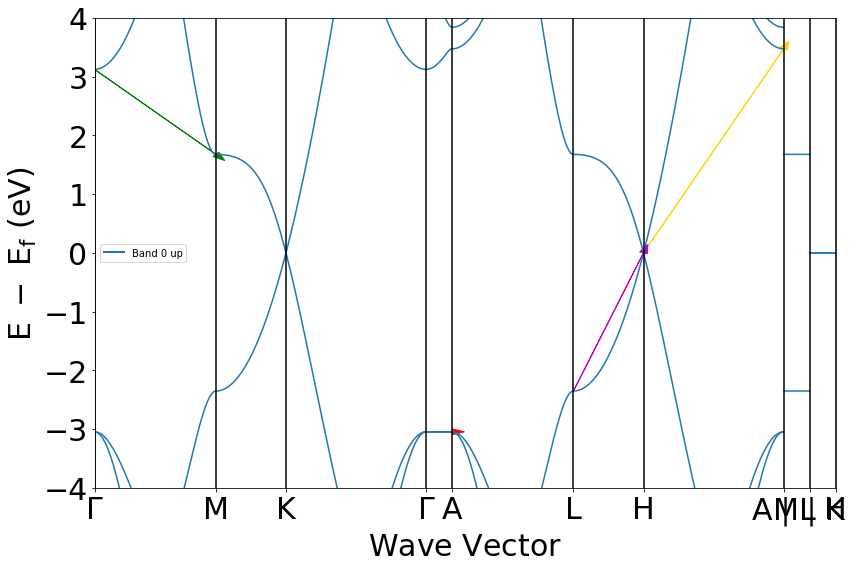

In [7]:
bsplotter.get_plot()

# Flèches :

# CONDUCTION 

dist1 = array_evol_dist[i_max_C-1]
energy1 = Energie['1'][i_max_C][:][4][0]
# my_distance[0] = distance du premier intervalle
dist1_2 = my_distance[i_max_C]
# diff_E_conduction[0] = energie du premier intervalle (fin-début)
energy1_2 = diff_E_conduction[i_max_C]

Arrow_C_max = plt.arrow(dist1,energy1,dist1_2,energy1_2, color = 'gold', head_width = 0.1)

dist1 = 0 # Pas compris dans l'évolution (array_evol_dist)
energy1 = Energie['1'][i_min_C][:][4][0]
# my_distance[0] = distance du premier intervalle
dist1_2 = my_distance[i_min_C]
# diff_E_conduction[0] = energie du premier intervalle (fin-début)
energy1_2 = diff_E_conduction[i_min_C]


Arrow_C_min = plt.arrow(dist1,energy1,dist1_2,energy1_2, color = 'g', head_width = 0.1)

# VALENCE

dist1 = array_evol_dist[i_max_V-1]
energy1 = Energie['1'][i_max_V][:][3][0]
# my_distance[0] = distance du premier intervalle
dist1_2 = my_distance[i_max_V]
# diff_E_conduction[0] = energie du premier intervalle (fin-début)
energy1_2 = diff_E_valence[i_max_V]

Arrow_V_max = plt.arrow(dist1,energy1,dist1_2,energy1_2, color = 'm', head_width = 0.1)

dist1 = array_evol_dist[i_min_V-1]
energy1 = Energie['1'][i_min_V][:][3][0]
# my_distance[0] = distance du premier intervalle
dist1_2 = my_distance[i_min_V]
# diff_E_conduction[0] = energie du premier intervalle (fin-début)
energy1_2 = diff_E_valence[i_min_V]

Arrow_V_min = plt.arrow(dist1,energy1,dist1_2,energy1_2, color = 'r', head_width = 0.1)

Bande de valence : On retrouve bien les pentes maximales et minimales dégagées précédemment aux bonnes positions. La flèche rouge représente la direction de dispersion minimale tandis que la flèche mauve représente la direction de dispersion maximale.

In [8]:
print ("direction de dispersion maximale : L - H et minimale : \u0393 - A")

direction de dispersion maximale : L - H et minimale : Γ - A


Bande de conduction : On retrouve bien les pentes maximales et minimales dégagées précédemment aux bonnes positions. La flèche verte représente la direction de dispersion minimale tandis que la flèche jaune représente la direction de dispersion maximale.

In [9]:
print ("direction de dispersion maximale : H - A|L et minimale : \u0393 - M")

direction de dispersion maximale : H - A|L et minimale : Γ - M


## Calcul de la masse effective

Afin de calculer la masse effective ($m^*$), nous allons approximer la dispersion par une équation du second degré (parabole). La formule de la masse effective est donnée par la formule suivante : $m^*$ = $\frac{\hbar^2}{\frac{\partial^2 \epsilon}{\partial k^2}}$ ce qui donnera bien une valeur constante pour une énergie du second ordre. $\newline$
Afin de caractériser la parabole, partons de l'expression suivante : $ax^2 + bx + c = y$. Dans l'objectif de déterminer les paramètres $a$,$b$ et $c$ (3 inconnues), il nous faut 3 équations et donc en théorie 3 points. Cependant, comme nous connaissons le maximum de la courbe, un point va donner 2 équations. Nous obtenons donc le système suivant en considérant 2 paires de coordonnées $(x1,y1)$ et $(x2,y2)$. $\textbf{NB :}$ le couple (x1,y1) sera considéré comme l'extremum. $\newline$


\begin{array}{rcl}
2ax_1 + b&=&0 \iff b&=& -2ax_1\\
ax_1^2 + bx_1 + c&=&y_1 \\
ax_2^2 + bx_2 + c&=&y_2 \\
\end{array}


$\newline$
En injectant la première équation dans les deux autres nous trouvons un système de deux équations à deux inconnues.$\newline$

\begin{array}{rcl}
- ax_1^2 + c&=&y_1 \\
ax_2^2 - 2ax_1x_2 + c&=&y_2 \\
\end{array}

$\newline$ 
En isolant les $c$ et en les égalant nous obtenons une expression pour $a,b$ et $c$ : $\newline$

\begin{array}{rcl}
a &=& \frac{y_1-y_2}{2x_1x_2 - x_1^2 - x_2^2} \\
b &=& -2ax_1\\
c &=& y_1 + ax_1^2 \\
\end{array}

$\newline$
Finalement, en dérivant 2 fois l'expression obtenue, nous obtenons le dénominateur de la fraction donnant la masse effective. Nous avons donc que $m^* = \frac{\hbar^2}{2a}$


On a comme équation pour la bande de conduction : y = 75.41552496924866 x^2 + -349.63892943588615 x + 405.2461717701031
On a comme équation pour la bande de valence : y = -76.77832984080858 x^2 + 355.95711970926175 x + -412.5691172705357


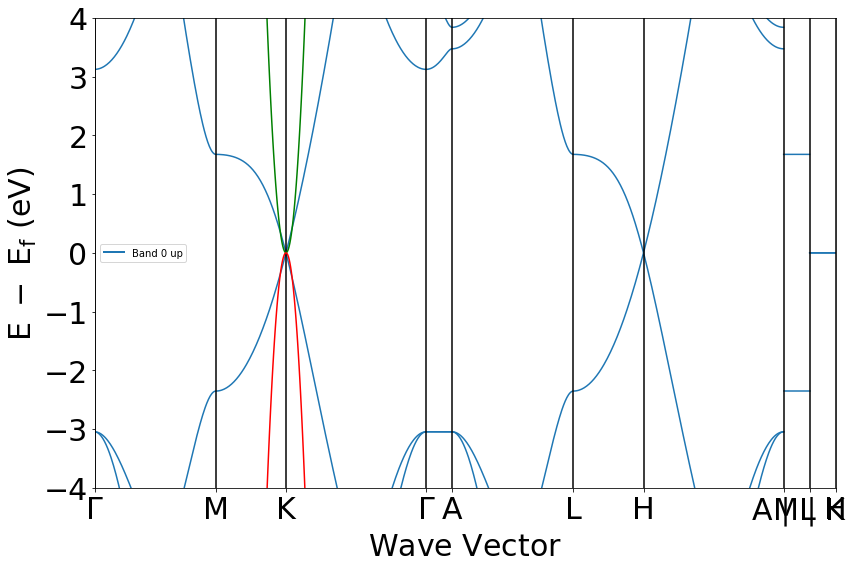

In [45]:
bsplotter.get_plot()

# CONDUCTION

# point minimum de la parabole
x1 = array_evol_dist[1]
y1 = Energie['1'][1][:][4][-1] # dernier élément de l'intervalle M-K

# autre point de la parabole
x2 = array_evol_dist[1] - 7*my_distance[1]/len(Energie['1'][1][:][4])  
y2 = Energie['1'][1][:][4][-8]

ac = (y1 - y2)/(2*x1*x2- x1**2 -x2**2)
bc = -2*ac*x1
cc = y1 + ac*x1**2
x = np.linspace(array_evol_dist[1] - 0.5*my_distance[1],array_evol_dist[1] + 0.5*my_distance[1],100)
y = ac*x**2+bc*x+cc

print("On a comme équation pour la bande de conduction : y =",ac,"x^2 +",bc,"x +",cc)
plt.plot(x,y,'g')
# VALENCE

# point maximum de la parabole
x1 = array_evol_dist[1]
y1 = Energie['1'][1][:][3][-1] # dernier élément de l'intervalle M-K 

# autre point de la parabole
x2 = array_evol_dist[1] - 7*my_distance[1]/len(Energie['1'][1][:][3])  
y2 = Energie['1'][1][:][3][-8]

av = (y1 - y2)/(2*x1*x2- x1**2 -x2**2)
bv = -2*av*x1
cv = y1 + av*x1**2
x = np.linspace(array_evol_dist[1] - 0.5*my_distance[1],array_evol_dist[1] + 0.5*my_distance[1],100)
y = av*x**2+bv*x+cv

plt.plot(x,y,'r')

print("On a comme équation pour la bande de valence : y =",av,"x^2 +",bv,"x +",cv)

L'approximation par une parabole a été effectuée grâce à un extremum (maximum ou minimum) et un point assez proche issus également des données.$\newline$
Notons que dans le cas du carbone, j'aurais pu calculer les paraboles en H.

In [ ]:
h_barre = 1.054571817*(10**-34)
eV = 1.602176634*(10**-19)
m = 1.0E-20 
m_elec = 9.1 *(10**-31)

print("CONDUCTION :")
# Conversion + dérivation
deriv_c = 2*ac*m*eV
# masse en kg
mc_eff = (h_barre**2)/deriv_c
print("la masse effective en kilogramme est de :",mc_eff," tandis que la masse normalisée par la masse de l'électron est de :",mc_eff/m_elec)
print(" ")
print("VALENCE :")
# Conversion + dérivation
deriv_v = 2*av*m*eV
# masse en kg

mc_eff = (h_barre**2)/deriv_v
print("la masse effective en kilogramme est de :",mc_eff," tandis que la masse normalisée par la masse de l'électron est de :",mc_eff/m_elec)



Les masses effectives ont bien été obtenues cependant elles varient de façon conséquente avec l'approximation parabolique faite. En effet, si le second point (autre que l'extremum) pris lors du calcul de $a,b$ et $c$ est fort proche, la parabole aura des coefficients très grands car la parabole sera raide. Au plus nous écartons les deux points pris au plus les coefficents diminuent. Comme la masse est inversément proportionnelle au coefficient $a$, lorsque celui-ci diminue, la masse augmente.

## Références

* LMAPR1492 : Physique des matériaux - https://moodleucl.uclouvain.be/course/view.php?id=7353
* Materials Project - https://materialsproject.org/materials/mp-990448/
* Matplotlib - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html
* Pymatgen : https://pymatgen.org/usage.html?fbclid=IwAR2AnLq_gW-VnqEG7-i42wszUE8sytOJDK790cZQnyq8xfKaoVxDYFml04o#pymatgen-matproj-rest-integration-with-the-materials-project-rest-api